In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("measurements.csv")

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
data.drop_duplicates()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


### Data Cleaning

In [6]:
data1 = data.drop(['refill liters', 'refill gas', 'specials'], axis =1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [7]:
data1["distance"] = data1["distance"].str.replace(",", ".").astype(float)
data1["consume"] = data1["consume"].str.replace(",", ".").astype(float)
data1["temp_inside"] = data1["temp_inside"].str.replace(",", ".").astype(float)

In [8]:
# fill missing values in "temp_inside" column with the mode
mode_temp_inside = data1['temp_inside'].mode().iloc[0]
data1['temp_inside'] = data1['temp_inside'].fillna(mode_temp_inside)


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [10]:
# Describing data in the dataset into min, max, mean & stdv
data1.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.916237,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.997449,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


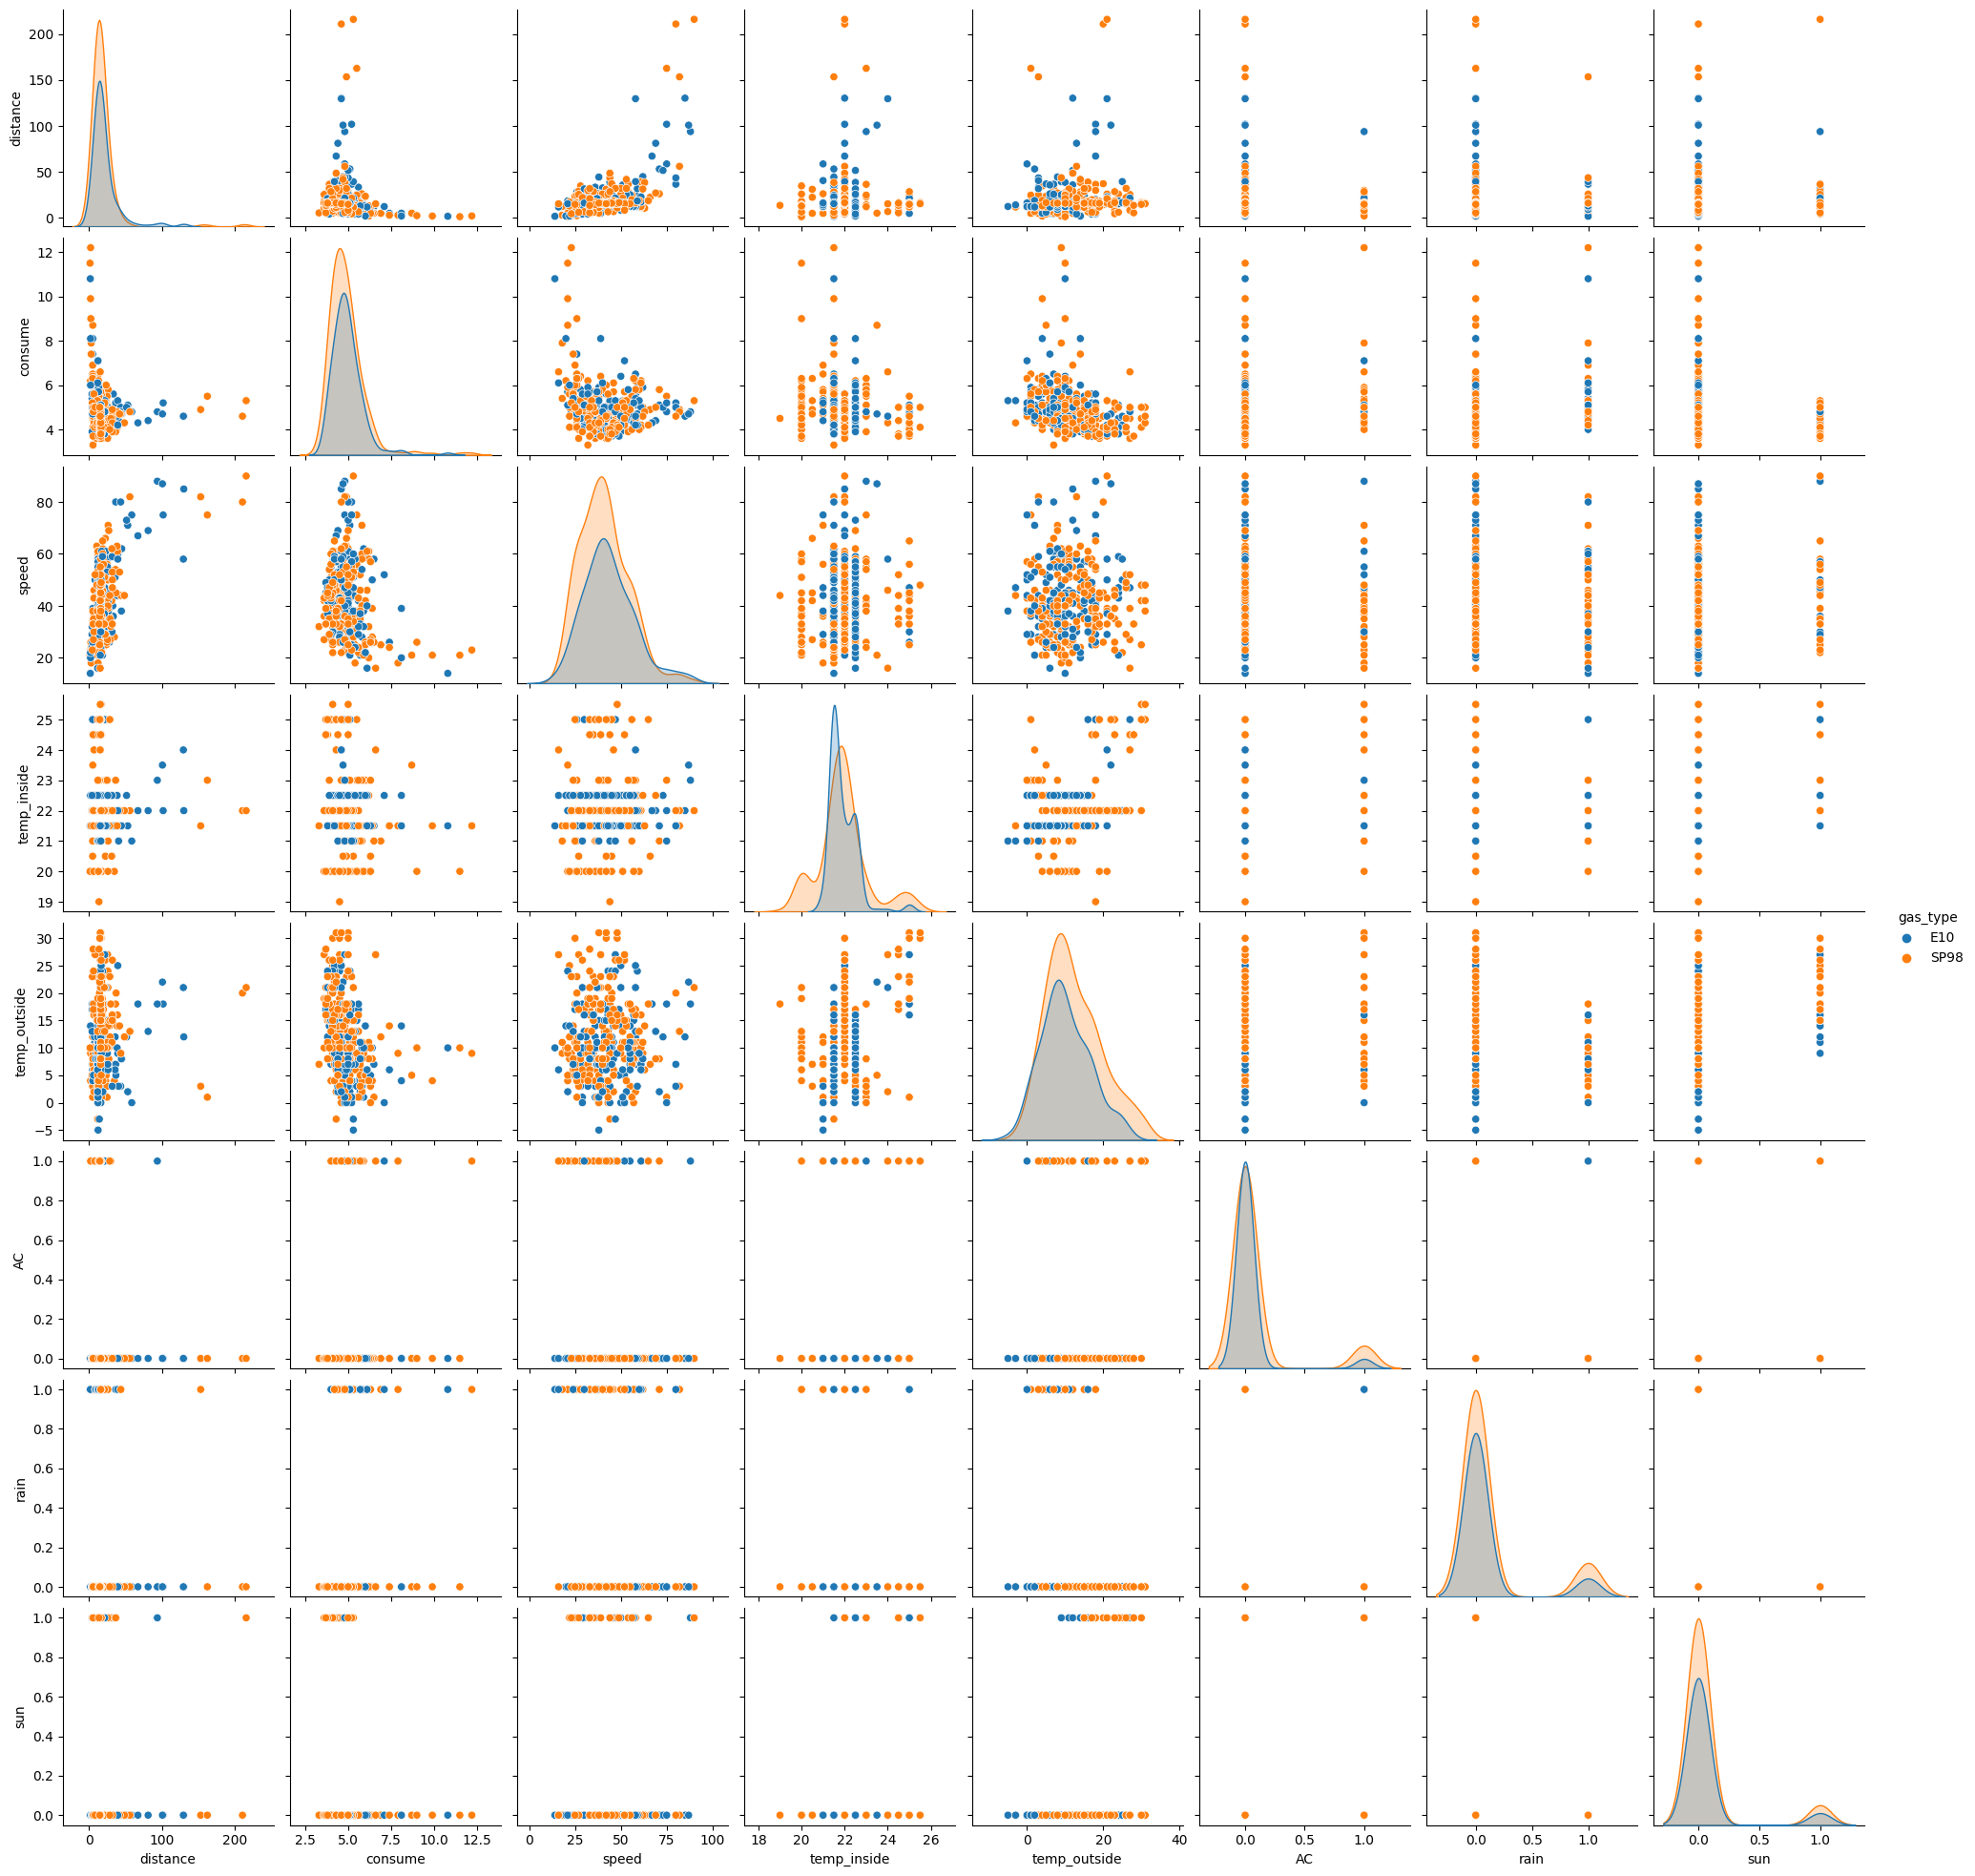

In [11]:
sns.pairplot(data1, hue = 'gas_type')

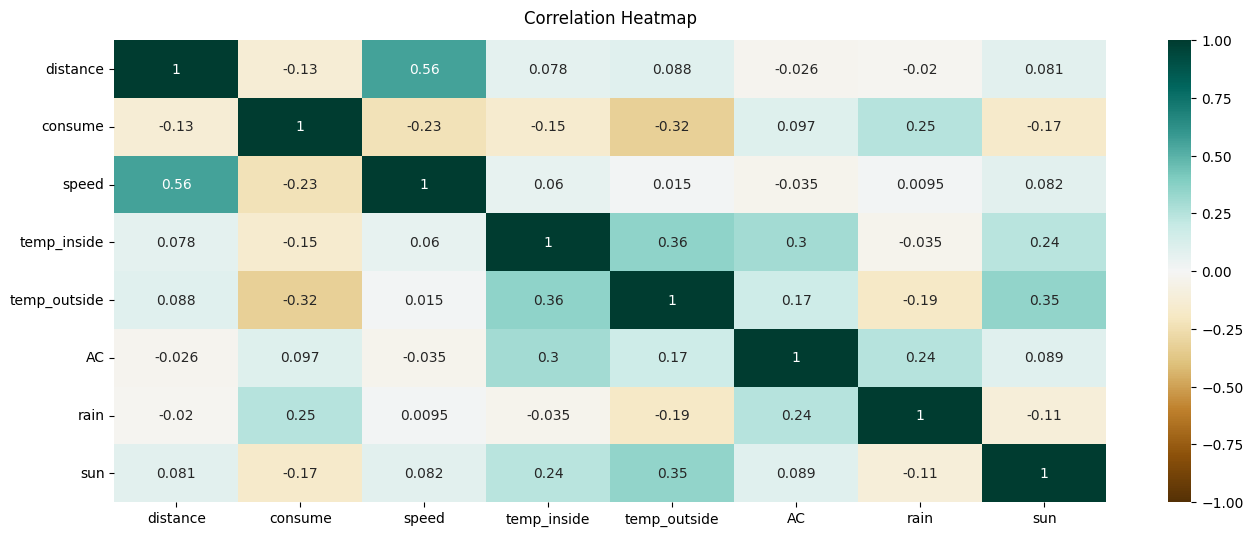

In [12]:
# Visualization the correlation of the dataset using seaborn 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

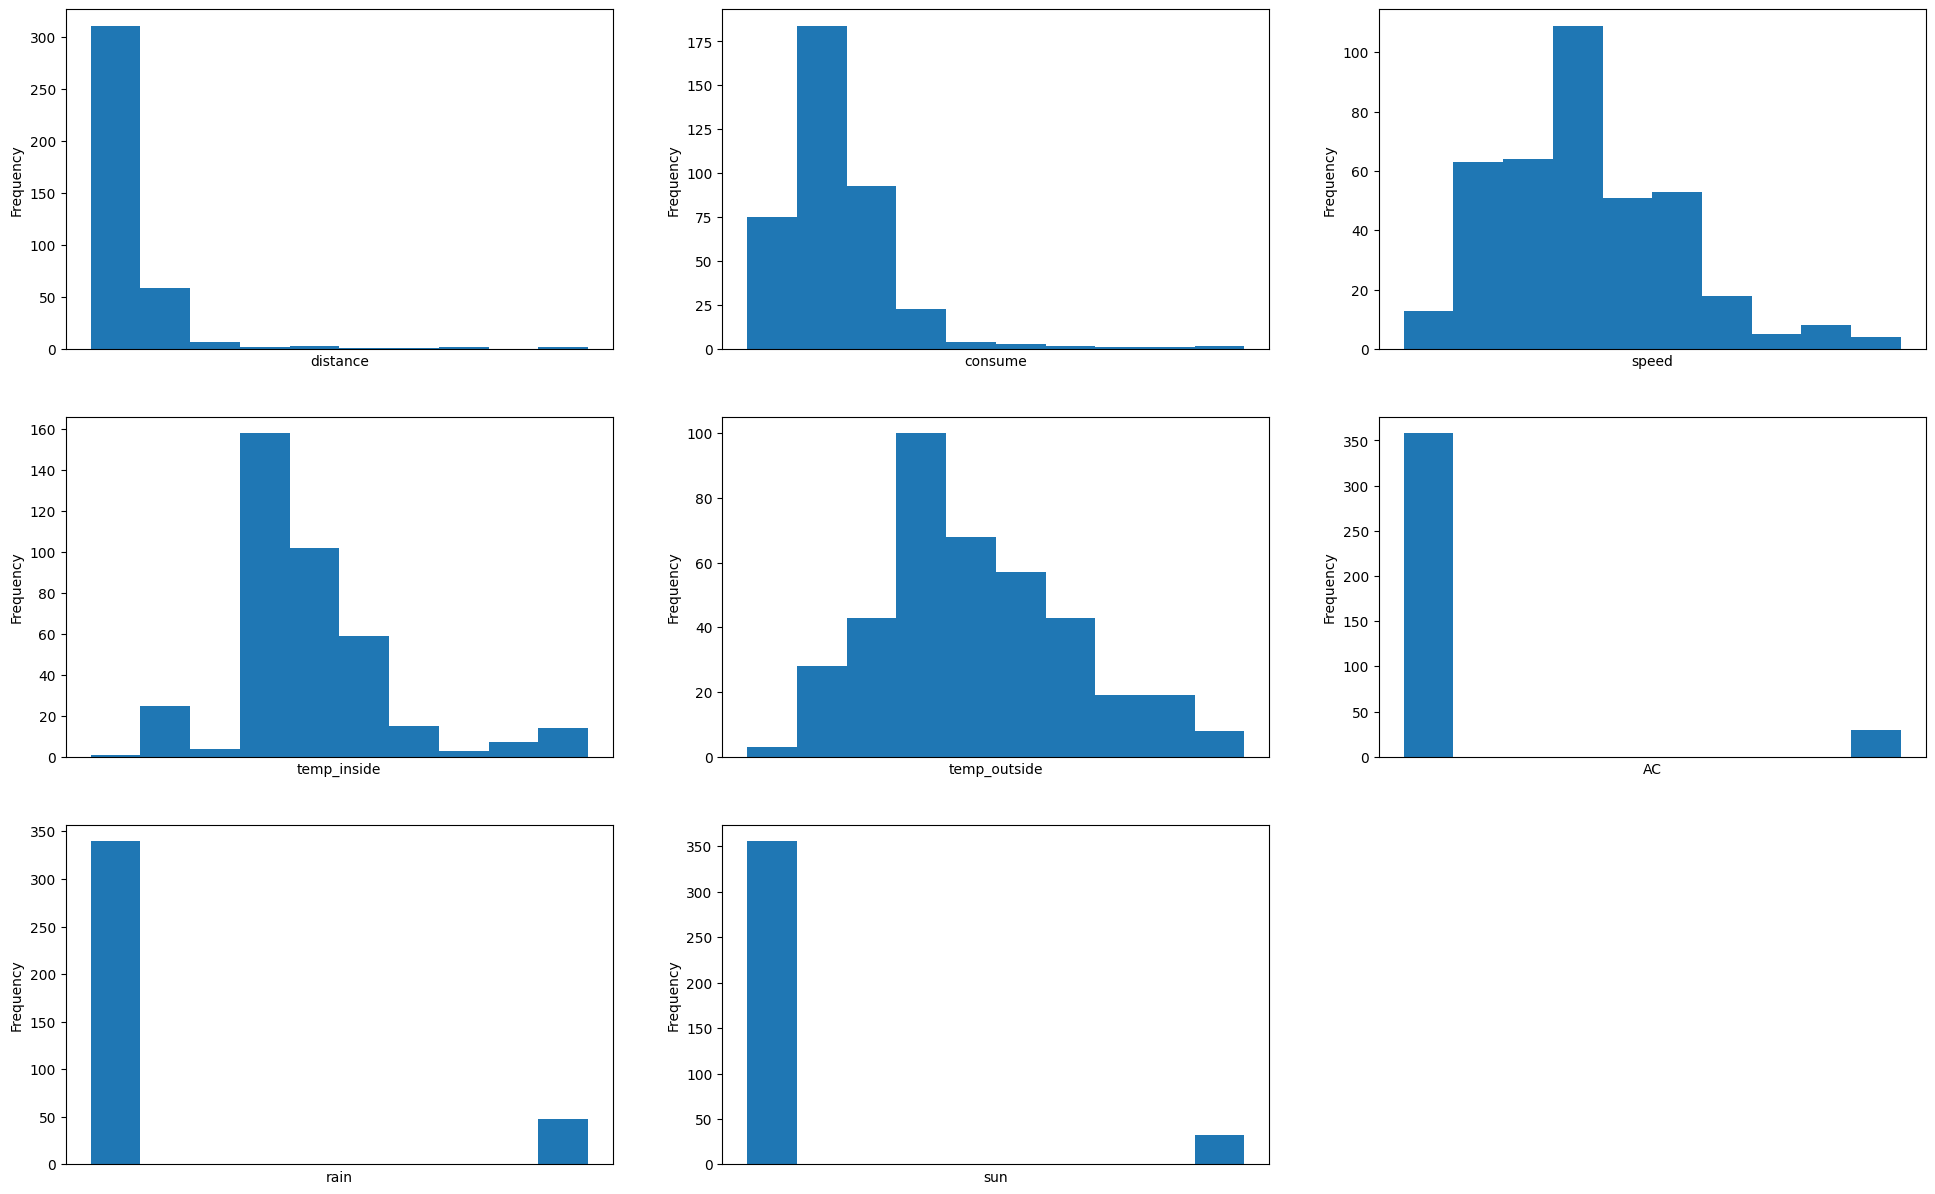

In [13]:
# select numeric columns only
numeric_cols = data1.select_dtypes(include='number').columns

# create a histogram for each numeric column
fig = plt.figure(figsize=(24, 15))
for i, col in enumerate(numeric_cols):
    sub = fig.add_subplot(3, 3, i + 1)
    sub.set_xlabel(col)
    sub.set_xticks([])
    data1[col].plot(kind='hist', ax=sub)

plt.show()


#### Checking Outliers

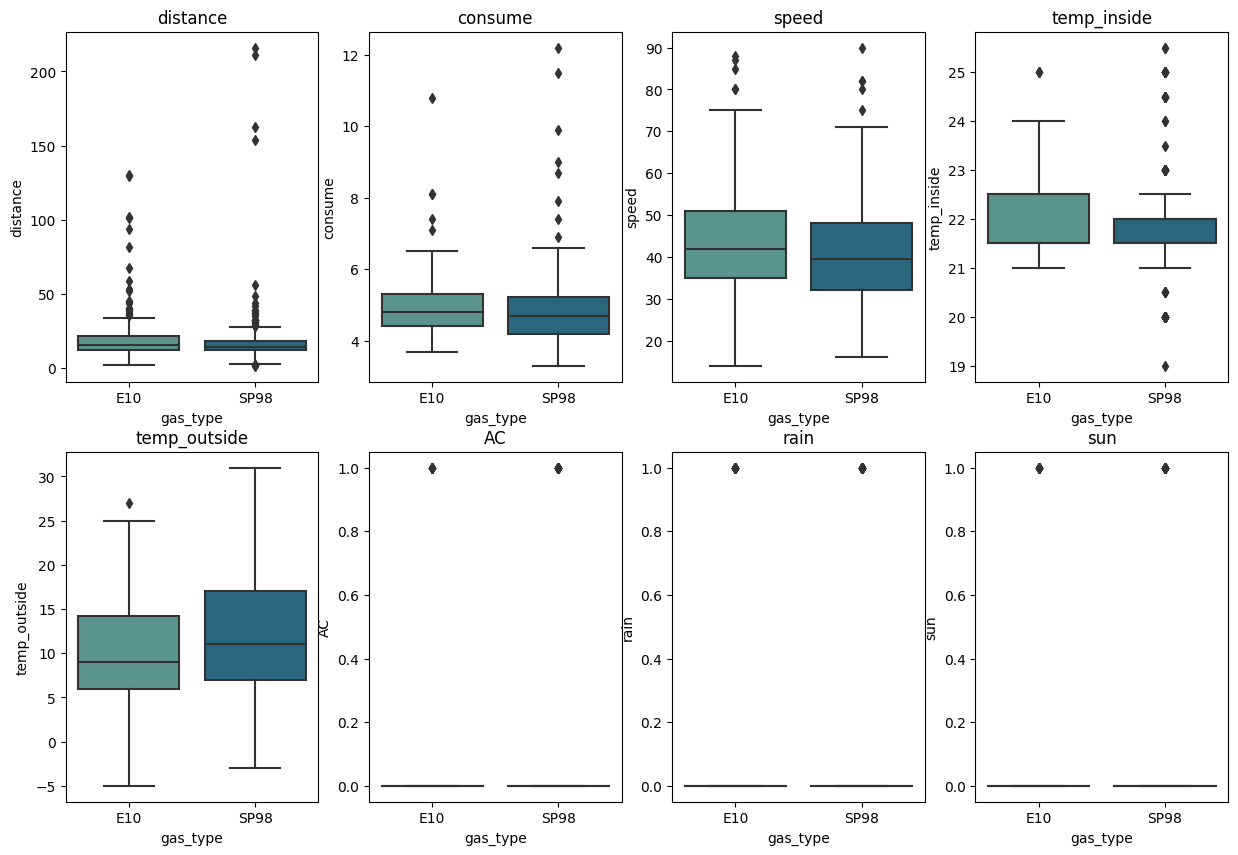

In [14]:
X_ = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun']
fig = plt.figure(figsize=(15, 10))

for i in range(len(X_)):
    column = X_[i]
    sub = fig.add_subplot(2, 4, i+1)
    sns.boxplot( x= 'gas_type', y = column, data=data1, palette = 'crest')
    sub.set_title(column)

In [15]:
data1['gas_type'] = data1['gas_type'].replace({'SP98': 0, 'E10': 1})

In [16]:
from sklearn.model_selection import train_test_split

# Set features (X) and the target variable (y)
X = data1.drop("gas_type", axis = 1)
y = data1.gas_type

data1['gas_type'] = data1['gas_type'].replace({'SP98': 0, 'E10': 1})

# Split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        68
           1       0.53      0.53      0.53        49

    accuracy                           0.61       117
   macro avg       0.60      0.60      0.60       117
weighted avg       0.61      0.61      0.61       117



<Axes: >

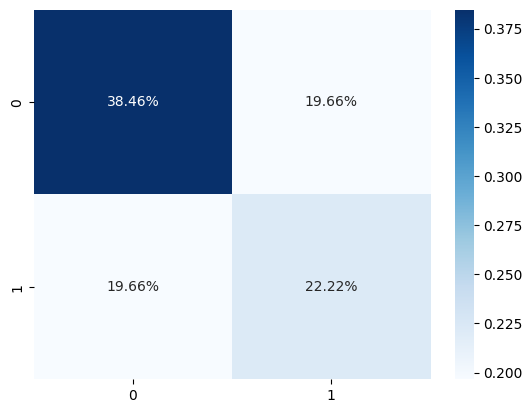

In [17]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train the XGBoost classifier
classifier = XGBClassifier(random_state=42, n_estimators=10000, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, objective='binary:logistic')
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

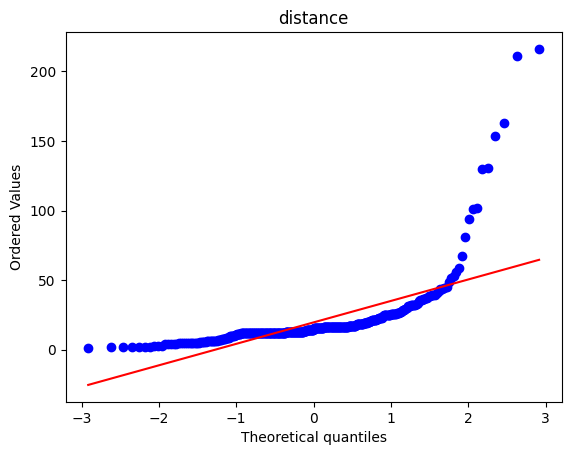

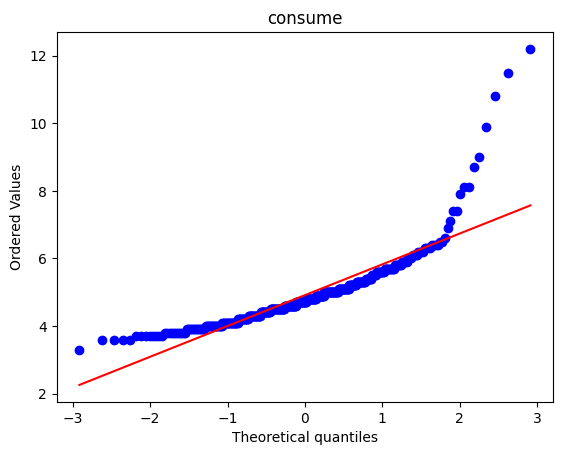

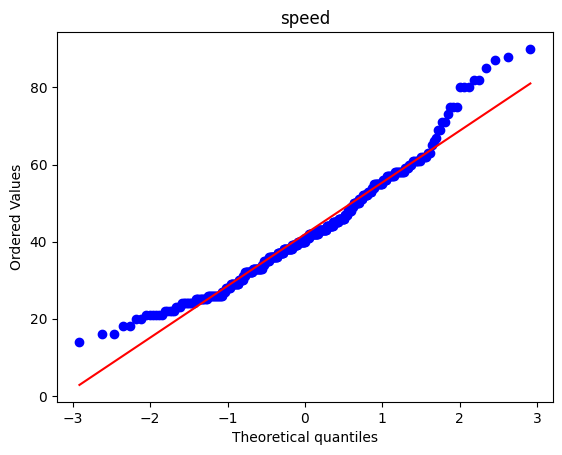

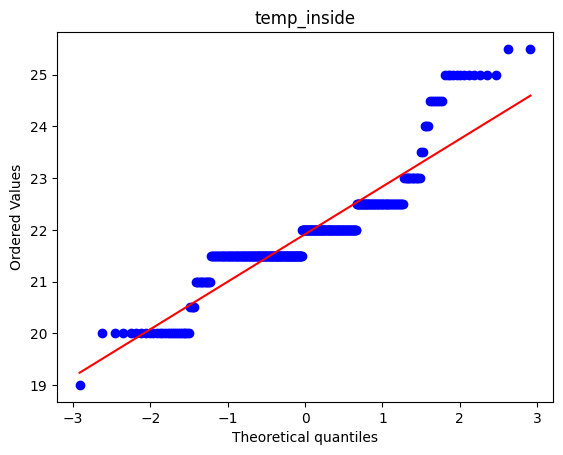

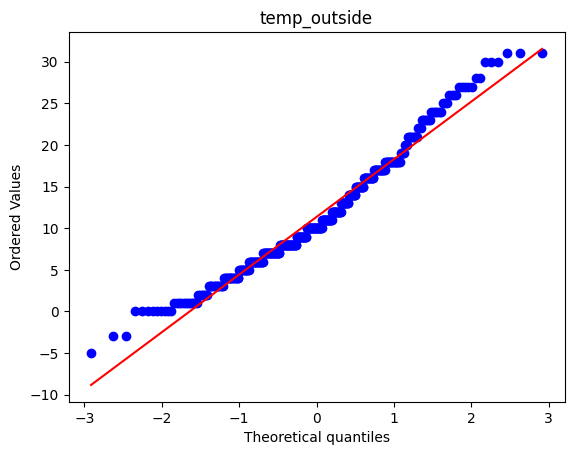

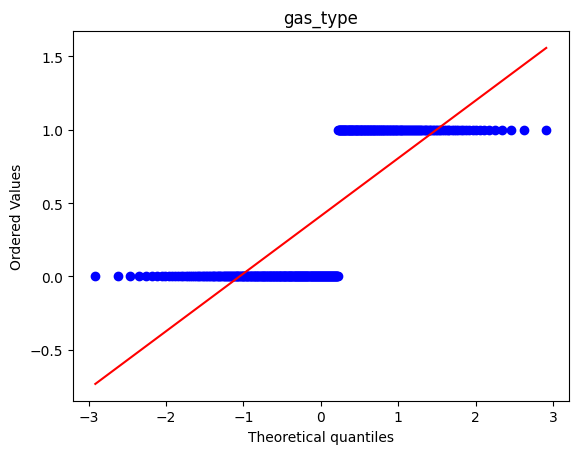

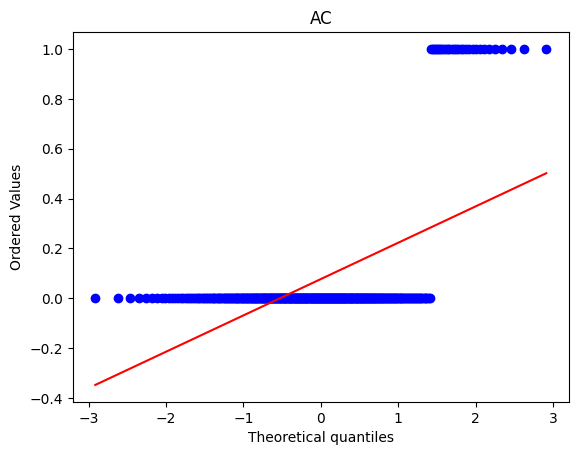

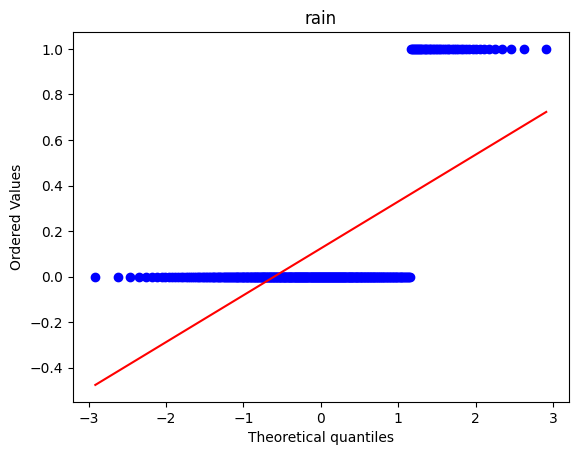

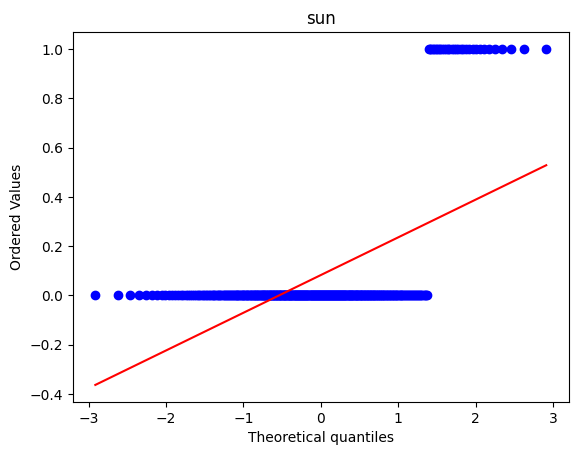

In [18]:
#Feature Engineering

from scipy import stats
from scipy.stats import norm, skew


for i in data1.columns:
    plt.figure()
    stats.probplot(data1[i], plot = plt)
    plt.title(i)
    plt.show()

In [19]:
skewed_feats = data1.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["Skewed"])
skewness

,Skewed
distance,5.462035
AC,3.164985
sun,3.035603
consume,2.926183
rain,2.285719
temp_inside,1.031433
speed,0.750400
temp_outside,0.571005
gas_type,0.356026


In [20]:
from sklearn.compose import ColumnTransformer

def custom_pipeline(sampler, model):
    return Pipeline([
        ('scaler',  ColumnTransformer([
            ("numericals", StandardScaler(), data1.select_dtypes('number').drop('gas_type', axis=1).columns)
        ])),
        ('sampler', sampler),
        ('model', model)
    ])

In [21]:
def show_confusion_matrix(y_pred, y_test, classes, title):
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(colorbar=False)
    disp.ax_.set_title(title)
    plt.show()

In [22]:
X = data1.drop("gas_type", axis = 1)
y = data1.gas_type

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


### Model Comparisson
##### Use SMOTE with Logistic Regression and Decision Tree Classifier

LogisticRegression - SMOTE
              precision    recall  f1-score   support

           0       0.63      0.61      0.62        69
           1       0.46      0.48      0.47        48

    accuracy                           0.56       117
   macro avg       0.54      0.54      0.54       117
weighted avg       0.56      0.56      0.56       117



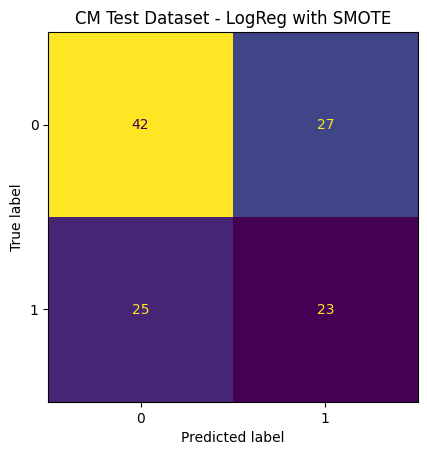

In [23]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

clf1 = custom_pipeline(SMOTE(), LogisticRegression())
clf1.fit(X_train, y_train)

y_pred_clf1 = clf1.predict(X_test)
print('LogisticRegression - SMOTE')
print(classification_report(y_test, y_pred_clf1))
show_confusion_matrix(y_pred_clf1, y_test, clf1[2].classes_, 'CM Test Dataset - LogReg with SMOTE')

Decision Tree Classifier - SMOTE
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        69
           1       0.44      0.46      0.45        48

    accuracy                           0.54       117
   macro avg       0.53      0.53      0.53       117
weighted avg       0.54      0.54      0.54       117



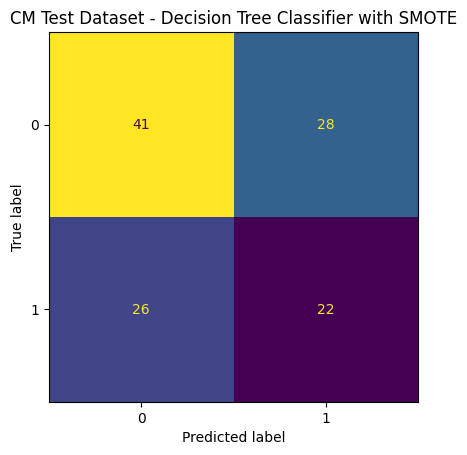

In [24]:
clf2 = custom_pipeline(SMOTE(), DecisionTreeClassifier())
clf2.fit(X_train, y_train)

y_pred_clf2 = clf2.predict(X_test)
print('Decision Tree Classifier - SMOTE')
print(classification_report(y_test, y_pred_clf2))
show_confusion_matrix(y_pred_clf2, y_test, clf2[2].classes_, 
                      'CM Test Dataset - Decision Tree Classifier with SMOTE')


Random Forest Classifier - SMOTE
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        69
           1       0.47      0.44      0.45        48

    accuracy                           0.56       117
   macro avg       0.55      0.54      0.54       117
weighted avg       0.56      0.56      0.56       117



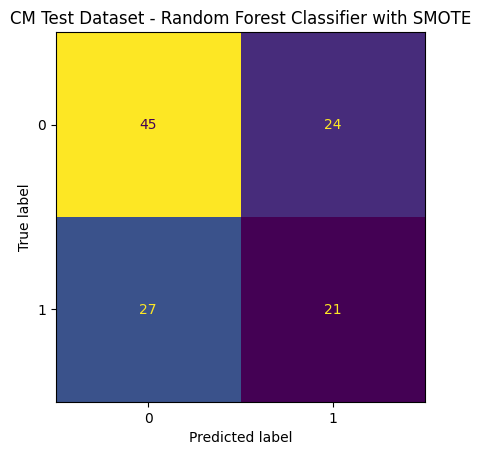

In [25]:
# Import Random Forest Classification Models
from sklearn.ensemble import RandomForestClassifier

clf3 = custom_pipeline(SMOTE(), RandomForestClassifier())
clf3.fit(X_train, y_train)

y_pred_clf3 = clf3.predict(X_test)
print('Random Forest Classifier - SMOTE')
print(classification_report(y_test, y_pred_clf3))
show_confusion_matrix(y_pred_clf3, y_test, clf3[2].classes_, 
                      'CM Test Dataset - Random Forest Classifier with SMOTE')

XGBClassifier - SMOTE
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        69
           1       0.45      0.48      0.46        48

    accuracy                           0.55       117
   macro avg       0.54      0.54      0.54       117
weighted avg       0.55      0.55      0.55       117



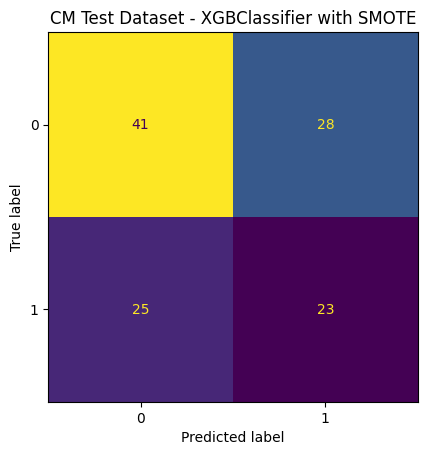

In [26]:
clf4 = custom_pipeline(SMOTE(), XGBClassifier())
clf4.fit(X_train, y_train)

y_pred_clf4 = clf4.predict(X_test)
print('XGBClassifier - SMOTE')
print(classification_report(y_test, y_pred_clf4))
show_confusion_matrix(y_pred_clf4, y_test, clf4[2].classes_, 
                      'CM Test Dataset - XGBClassifier with SMOTE')

In [27]:
def create_comparisson_table():
    return pd.DataFrame([], columns=['model', 'sampler', 'f1_score', 'yes_f1', \
                                          'yes_precision', 'yes_recall', 'no_f1', 'no_precision', 'no_recall'])


def add_scores_to_overall_results(df_results, scores_test, sampler, estimator):
    df_results.loc[df_results.shape[0]] = [get_class_name(estimator), get_class_name(sampler) if sampler else None,
                                          scores_test.at["accuracy","f1-score"], scores_test.at["1","f1-score"],
                                          scores_test.at["1","precision"], scores_test.at["1","recall"],
                                          scores_test.at["0","f1-score"], scores_test.at["0","precision"],
                                          scores_test.at["0","recall"]]
    
def get_class_name(cl):
    return cl.__class__.__name__

In [28]:
models_smote = create_comparisson_table()

In [29]:
add_scores_to_overall_results(models_smote, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf1, output_dict=True)).T, 
                              clf1[1], 
                              clf1[2]
                             )
                             

add_scores_to_overall_results(models_smote, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf2, output_dict=True)).T, 
                              clf2[1], 
                              clf2[2]
                               )

add_scores_to_overall_results(models_smote, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf3, output_dict=True)).T, 
                              clf3[1], 
                              clf3[2]
                               )

add_scores_to_overall_results(models_smote, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf4, output_dict=True)).T, 
                              clf4[1], 
                              clf4[2]
                               )

In [30]:
models_smote

,model,sampler,f1_score,yes_f1,yes_precision,yes_recall,no_f1,no_precision,no_recall
0,LogisticRegression,SMOTE,0.555556,0.469388,0.460000,0.479167,0.617647,0.626866,0.608696
1,DecisionTreeClassifier,SMOTE,0.538462,0.448980,0.440000,0.458333,0.602941,0.611940,0.594203
2,RandomForestClassifier,SMOTE,0.564103,0.451613,0.466667,0.437500,0.638298,0.625000,0.652174
3,XGBClassifier,SMOTE,0.547009,0.464646,0.450980,0.479167,0.607407,0.621212,0.594203


#### Use TomekLinks with Logistic Regression and Decision Tree Classifier

LogisticRegression - TomekLinks
              precision    recall  f1-score   support

           0       0.59      0.62      0.61        69
           1       0.41      0.38      0.39        48

    accuracy                           0.52       117
   macro avg       0.50      0.50      0.50       117
weighted avg       0.52      0.52      0.52       117



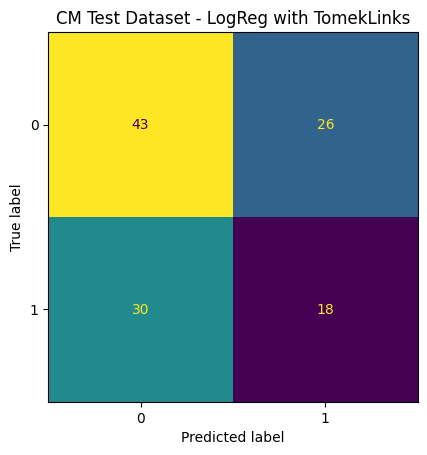

In [31]:
clf5 = custom_pipeline(TomekLinks(), LogisticRegression())
clf5.fit(X_train, y_train)

y_pred_clf5 = clf5.predict(X_test)
print('LogisticRegression - TomekLinks')
print(classification_report(y_test, y_pred_clf5))
show_confusion_matrix(y_pred_clf5, y_test, clf5[2].classes_, 'CM Test Dataset - LogReg with TomekLinks')

Decision Tree Classifier - TomekLinks
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        69
           1       0.45      0.52      0.48        48

    accuracy                           0.54       117
   macro avg       0.53      0.54      0.53       117
weighted avg       0.55      0.54      0.54       117



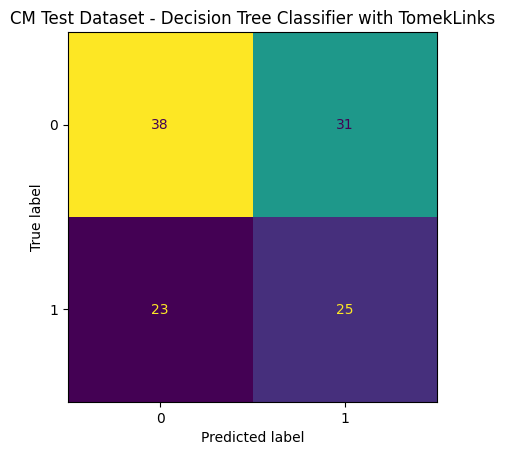

In [32]:
clf6 = custom_pipeline(TomekLinks(), DecisionTreeClassifier())
clf6.fit(X_train, y_train)

y_pred_clf6 = clf6.predict(X_test)
print('Decision Tree Classifier - TomekLinks')
print(classification_report(y_test, y_pred_clf6))
show_confusion_matrix(y_pred_clf6, y_test, clf6[2].classes_, 
                      'CM Test Dataset - Decision Tree Classifier with TomekLinks')


In [33]:
models_tl = create_comparisson_table()
add_scores_to_overall_results(models_tl, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf5, output_dict=True)).T, 
                              clf5[1], 
                              clf5[2])

add_scores_to_overall_results(models_tl, 
                              pd.DataFrame(classification_report(y_test, y_pred_clf6, output_dict=True)).T, 
                              clf6[1], 
                              clf6[2])

In [34]:
models_tl

,model,sampler,f1_score,yes_f1,yes_precision,yes_recall,no_f1,no_precision,no_recall
0,LogisticRegression,TomekLinks,0.521368,0.391304,0.409091,0.375000,0.605634,0.589041,0.623188
1,DecisionTreeClassifier,TomekLinks,0.538462,0.480769,0.446429,0.520833,0.584615,0.622951,0.550725


### Making a Predctive analysis (Model Deployment)
Model deployment is the process of putting machine learning models into production. This makes the model’s predictions available to users, developers or systems, so they can make business decisions based on data, interact with their application

In [37]:
input_data = (13.1,6.1,46,21.5,6,0,1,0)

scaler = StandardScaler()
scaler.fit(X_train)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

#prediction = classifier(std_data)
#print(prediction)

[[-0.31228252  1.28821807  0.29385338 -0.41572371 -0.74535702 -0.26673253
   2.55495162 -0.28227872]]
